In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=10, frameon=True, figsize=(2, 2), transparent=False, format="pdf")

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
PIL                 8.1.1
anndata             0.7.5
anyio               NA
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
fasteners           NA
future_fstrings     NA
google              NA
h5py                2.10.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_serv

In [4]:
small_muscle = sc.read_h5ad("./../../../pyobjs_github/small_muscle.h5ad")

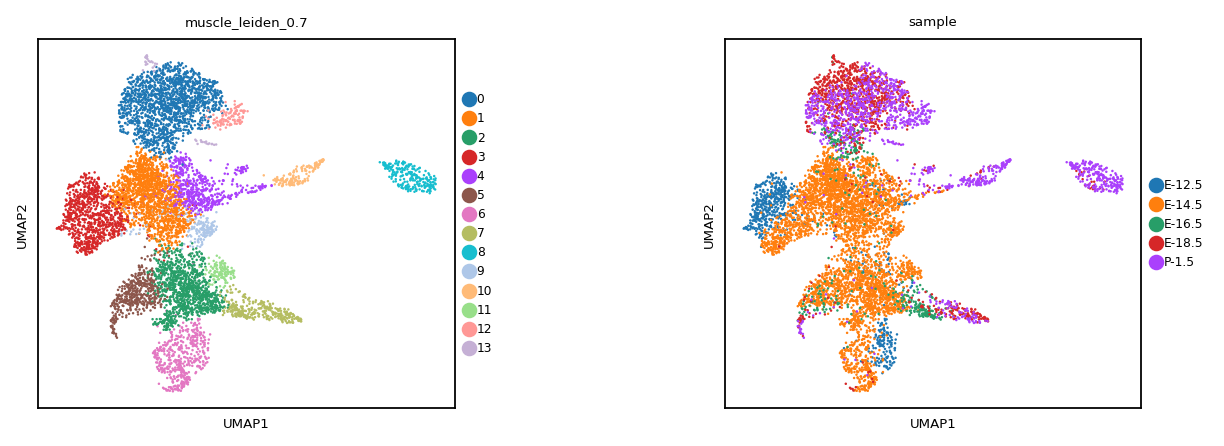

In [405]:
sc.pl.umap(small_muscle, color = ["muscle_leiden_0.7", "sample"], size=5, wspace=0.5)

In [489]:
fibroblast_clusters = ["0", "12"]
intestine_fibro = small_muscle.raw.to_adata()[small_muscle.obs["muscle_leiden_0.7"].isin(fibroblast_clusters)]
print(intestine_fibro)

View of AnnData object with n_obs × n_vars = 1708 × 19652
    obs: 'sample', 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', 'leiden_0.3', 'leiden_0.5', 'muscle_leiden_0.5', 'muscle_leiden_0.6', 'muscle_leiden_0.7', 'clusters_muscle_leiden_0.7', 'dpt_pseudotime'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_0.3_colors', 'leiden_0.5_colors', 'leiden_0.5_sizes', 'neighbors', 'paga', 'pca', 'sample_colors', 'umap', 'muscle_leiden_0.6_colors', 'muscle_leiden_0.7_colors', 'phase_colors', 'clusters_muscle_leiden_0.7_colors', 'clusters_muscle_leiden_0.7_sizes', 'rank_genes_groups_small_muscle_leiden_0.7', 'rank_genes_groups_clusters_muscle_leiden_0.7', 'dendrogram_clusters_muscle_leiden_0.7', 'iroot

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


extracting highly variable genes
    finished (0:00:00)


Trying to set attribute `.uns` of view, copying.


--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


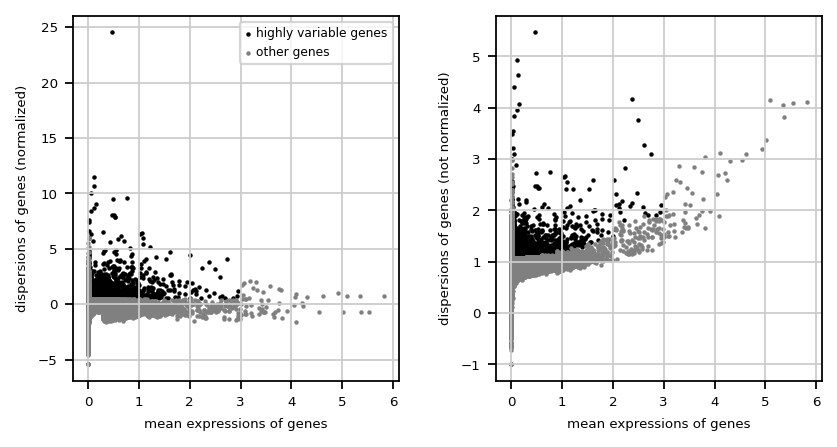

regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


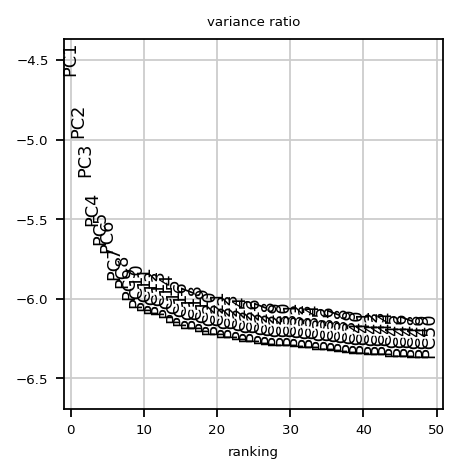

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
running Leiden clustering
    finished: found 6 clusters and added
    'fibro_leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)


In [490]:
sc.pp.highly_variable_genes(intestine_fibro, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(intestine_fibro)
intestine_fibro.raw = intestine_fibro
intestine_fibro = intestine_fibro[:, intestine_fibro.var.highly_variable]
sc.pp.regress_out(intestine_fibro, ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)
sc.pp.scale(intestine_fibro, max_value=10)
sc.tl.pca(intestine_fibro, svd_solver='arpack', random_state=0)
sc.pl.pca_variance_ratio(intestine_fibro, n_pcs = 50, log=True)
sc.pp.neighbors(intestine_fibro, n_pcs=30)
sc.tl.umap(intestine_fibro)
sc.tl.leiden(intestine_fibro, key_added="fibro_leiden_0.5", resolution = 0.5)
sc.tl.leiden(intestine_fibro, key_added="fibro_leiden_0.3", resolution = 0.3)

In [525]:
sc.tl.leiden(intestine_fibro, key_added="fibro_leiden_0.4", resolution = 0.4)

running Leiden clustering
    finished: found 5 clusters and added
    'fibro_leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)


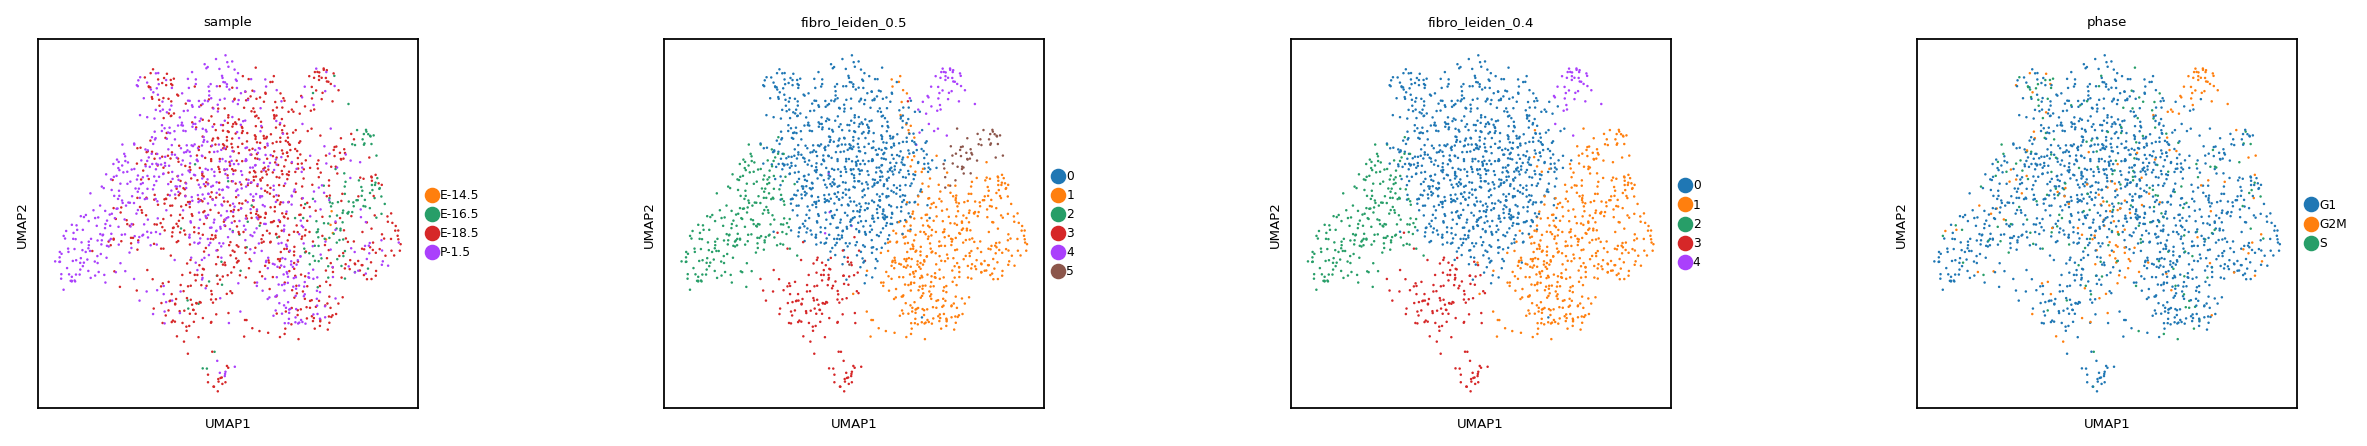

In [526]:
sc.pl.umap(intestine_fibro, color=["sample", "fibro_leiden_0.5", "fibro_leiden_0.4", "phase"], wspace=0.5, size = 5)

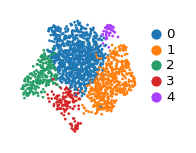

In [527]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(intestine_fibro, color = ['fibro_leiden_0.4'], size=6, legend_fontsize=6, frameon=False, title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/fibro_celltypes_umap.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3.0, 3.0), vector_friendly = False, transparent=True, format="pdf")

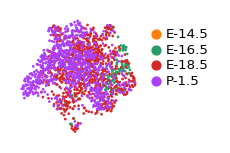

In [528]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(intestine_fibro, color = ['sample'], size=6, legend_fontsize=6, frameon=False, title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/fibro_stage_umap.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3.0, 3.0), vector_friendly = False, transparent=True, format="pdf")

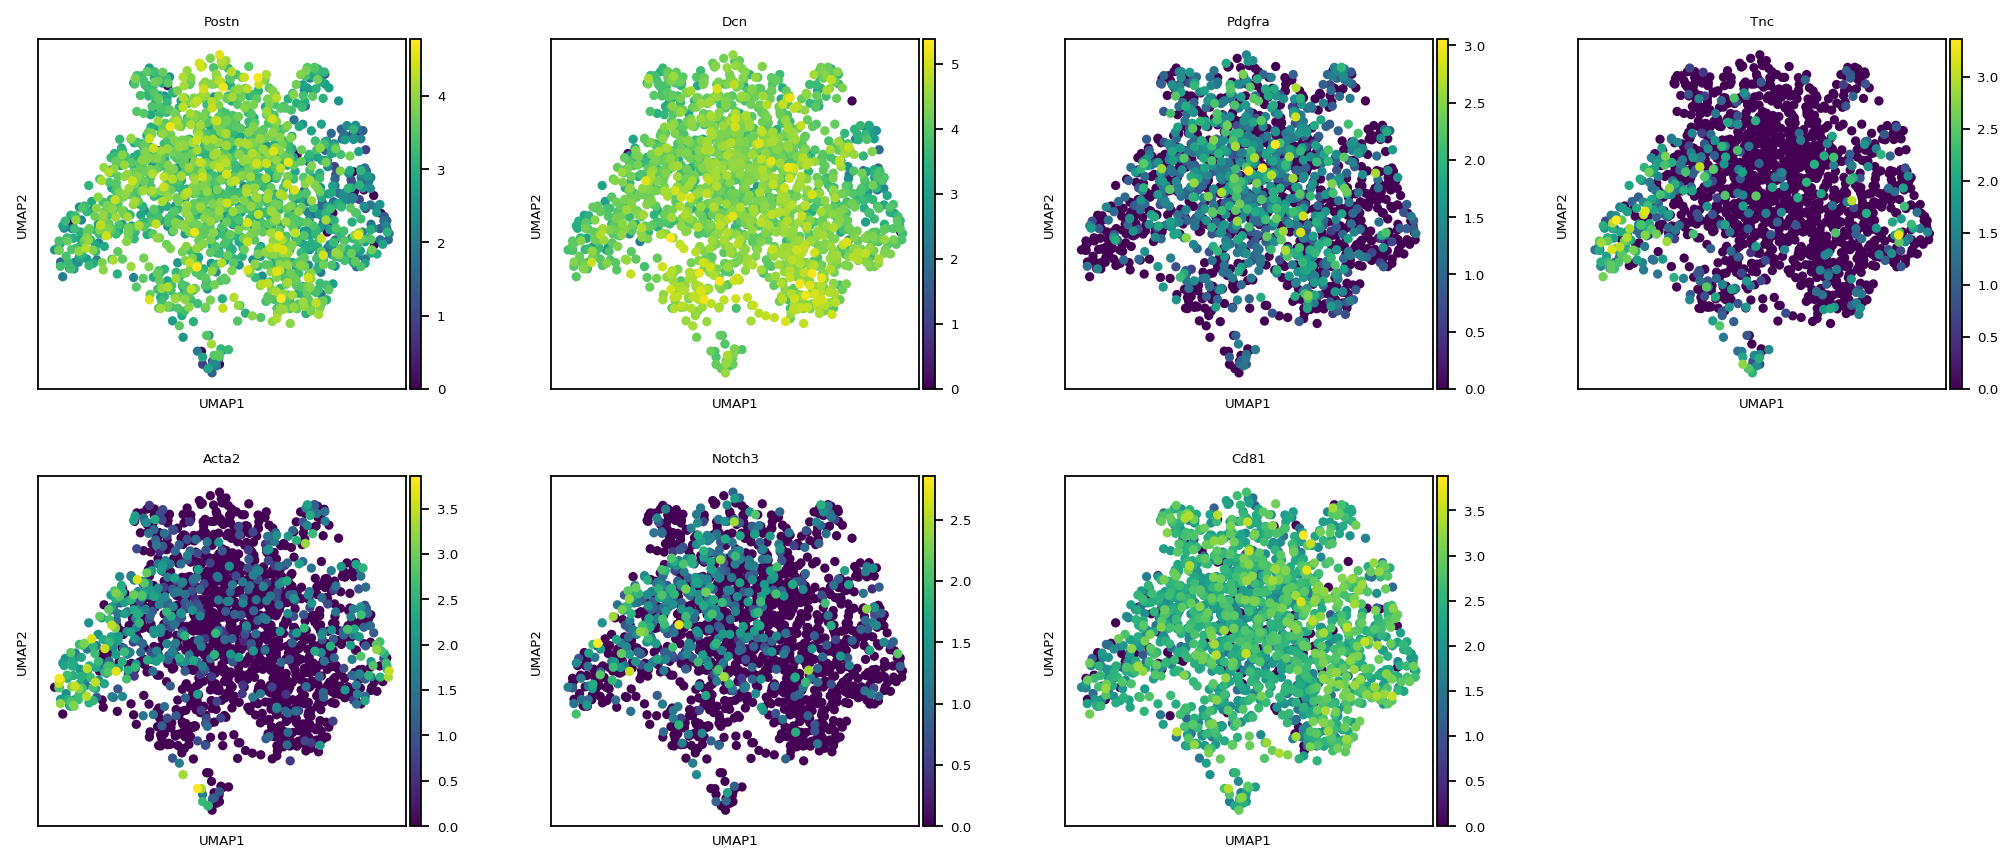

In [495]:
sc.pl.umap(intestine_fibro, color=["Postn", "Dcn", "Pdgfra", "Tnc", "Acta2", "Notch3", "Cd81"])

In [529]:
sc.tl.rank_genes_groups(intestine_fibro, groupby="fibro_leiden_0.4", key_added="rank_genes_groups_fibro_leiden_0.4")

ranking genes
    finished: added to `.uns['rank_genes_groups_fibro_leiden_0.4']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [530]:
result = intestine_fibro.uns['rank_genes_groups_fibro_leiden_0.4']
groups = result['names'].dtype.names
celltype_markers = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges', 'pvals']}).head(40)
celltype_markers

0_n       0_l           0_p       1_n       1_l           1_p  \
0    Igfbp5  1.935789  1.307724e-79     Sfrp2  2.684606  3.901858e-59   
1      Ebf1  1.333813  5.599826e-60      Pbx1  1.471838  2.417475e-56   
2    Clec3b  1.541292  6.079619e-55       Maf  2.003024  1.266301e-53   
3      Dkk2  2.371401  2.507050e-35       Ptn  0.861628  4.167252e-41   
4       Gsn  0.639114  2.367617e-34      Dlk1  0.787671  6.785760e-40   
5      Nrp1  0.966722  2.186650e-33      Meg3  0.567310  3.000016e-37   
6     Agtr2  1.323471  4.486724e-30     Sulf2  1.506024  4.892686e-35   
7    Entpd2  1.396850  1.474983e-29     Capn6  1.978792  1.598443e-33   
8    Akap12  0.844476  4.446045e-28       Wt1  1.970554  8.018236e-33   
9    S100a6  0.699902  8.117857e-28      Gas1  0.981043  1.397462e-33   
10  S100a10  0.726214  1.763585e-27    Ccdc80  1.225983  2.824350e-32   
11     Klf5  1.854760  5.253717e-27     Mfap2  0.754391  4.917035e-31   
12    Matn2  0.961147  1.768831e-26  Kcnq1ot1  0.911619  3.291861e-30   
13     C1s1  1.083817  5.207507e-25    Cdkn1c  0.861934  2.004484e-25   
14   Abca8a  1.428627  4.589991e-24     Plpp3  1.564261  1.414854e-23   
15     Penk  1.084252  5.180365e-24      Ly6h  1.570446  7.731256e-22   
16    Mfap5  0.856011  2.671197e-23   Col15a1  1.995603  3.437403e-21   
17   Igfbp6  1.342970  1.287400e-22     Csrp2  1.122732  2.350799e-21   
18      Vim  0.401853  2.315904e-22       Ogn  0.940611  5.026512e-21   
19   Col5a3  0.936426  4.089858e-22    Piezo2  1.621763  1.225386e-20   
20      H19  0.628263  3.517635e-21    Plxdc2  1.199071  3.439262e-19   
21    Tppp3  0.981022  1.787698e-20    Plagl1  0.860178  6.416111e-19   
22  Emilin2  1.278900  3.976890e-20     Chodl  3.575872  7.351721e-18   
23    Itm2a  0.617178  4.173726e-20    Atp1b1  1.295167  6.972192e-18   
24    Itih5  0.709972  2.998820e-19    Sema3d  1.880572  1.088611e-17   
25     Cdo1  1.156158  1.578507e-17       Des  1.921480  1.128699e-17   
26    Postn  0.466012  1.065075e-16     Ptgis  1.457943  1.888657e-17   
27   Ifitm1  0.730681  1.328074e-16     Smoc2  1.003045  1.591036e-17   
28      Vit  1.498147  4.345229e-16     Sned1  1.265457  1.368900e-16   
29  Gm10605  2.019444  5.291359e-16     Ramp1  2.239665  7.133926e-16   
30     Zeb2  0.584733  5.401386e-16     Tgfbi  2.566617  1.887381e-15   
31   Marcks  0.398218  2.134646e-15      Ank3  2.347021  8.709061e-15   
32     Cygb  0.779141  3.669473e-15     Stmn2  1.500715  7.347048e-15   
33    Lypd2  2.169201  7.400104e-15      Mmp2  0.852051  7.431205e-15   
34    Prrx1  0.861154  6.591092e-15     Fndc5  2.666496  1.444208e-14   
35  Fam110b  0.912147  3.180484e-14    Col9a2  2.153191  1.380638e-14   
36    Kcnb2  1.329727  5.536767e-14      Ldhb  1.526878  1.906317e-13   
37   Pdgfra  0.785385  1.043132e-13     Cpxm1  1.149067  2.068105e-13   
38    Ahnak  0.516820  1.206621e-13       Mdk  0.558325  1.663705e-13   
39      Id4  0.993288  1.907627e-13     Fbln1  0.606271  1.796240e-13   

         2_n       2_l           2_p      3_n       3_l           3_p  \
0      Thbs2  2.529825  1.098956e-68    Slit2  1.142330  3.021279e-17   
1        Mgp  2.290649  2.698785e-49    Stmn2  2.715322  3.086448e-16   
2        Bgn  1.305798  1.280000e-46   Atp1b1  2.035214  6.127139e-16   
3        Eln  2.436272  3.277166e-42    Mfap4  1.457364  4.150682e-16   
4       Fhl1  2.386905  1.826964e-41    Spon1  3.808517  4.683012e-15   
5      Acta2  3.075163  3.127197e-38     Nnat  3.247080  1.747398e-14   
6     Col4a1  1.580803  5.188059e-40   Cxcl12  1.225438  7.954901e-15   
7      Tagln  3.419791  2.290731e-37      Dcn  0.453605  1.318741e-14   
8       Myl9  2.034150  2.391760e-37     Meg3  0.621949  1.825838e-14   
9     Col4a2  1.632812  2.441786e-37      Eln  1.397572  3.747409e-13   
10     Crip1  1.580565  4.356308e-38     Pid1  1.987174  1.733927e-12   
11      Actb  0.912641  8.279080e-35   Adgrl3  2.165965  2.237751e-12   
12      Fhl2  3.262172  2.785301e-31    Mmp16  2.056419  5.221470

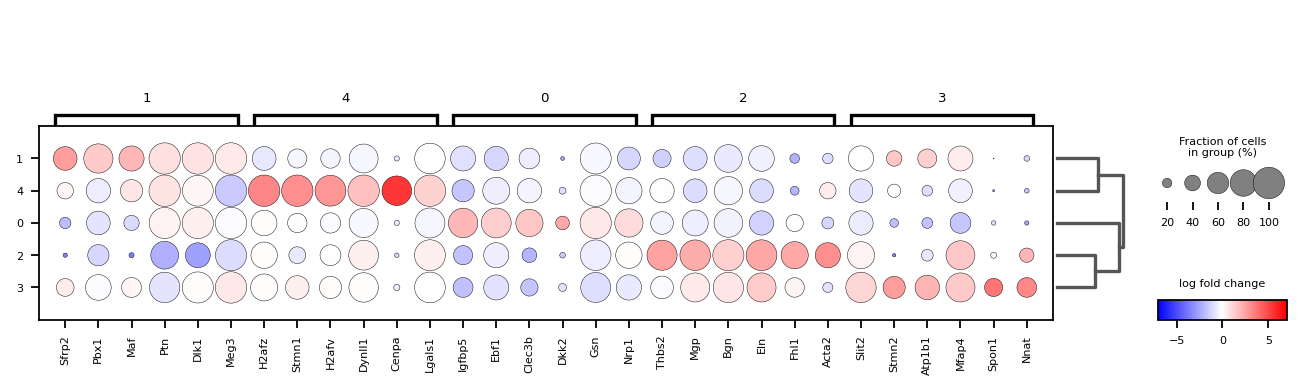

In [539]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, vector_friendly = False, format="pdf")
fig, ax = plt.subplots(figsize = (10,2.5))
sc.pl.rank_genes_groups_dotplot(intestine_fibro, n_genes=6, key="rank_genes_groups_fibro_leiden_0.4", values_to_plot='logfoldchanges', min_logfoldchange=0.5, vmax=7, vmin=-7, cmap='bwr', show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/fibro_subclusters_dotplot.pdf")

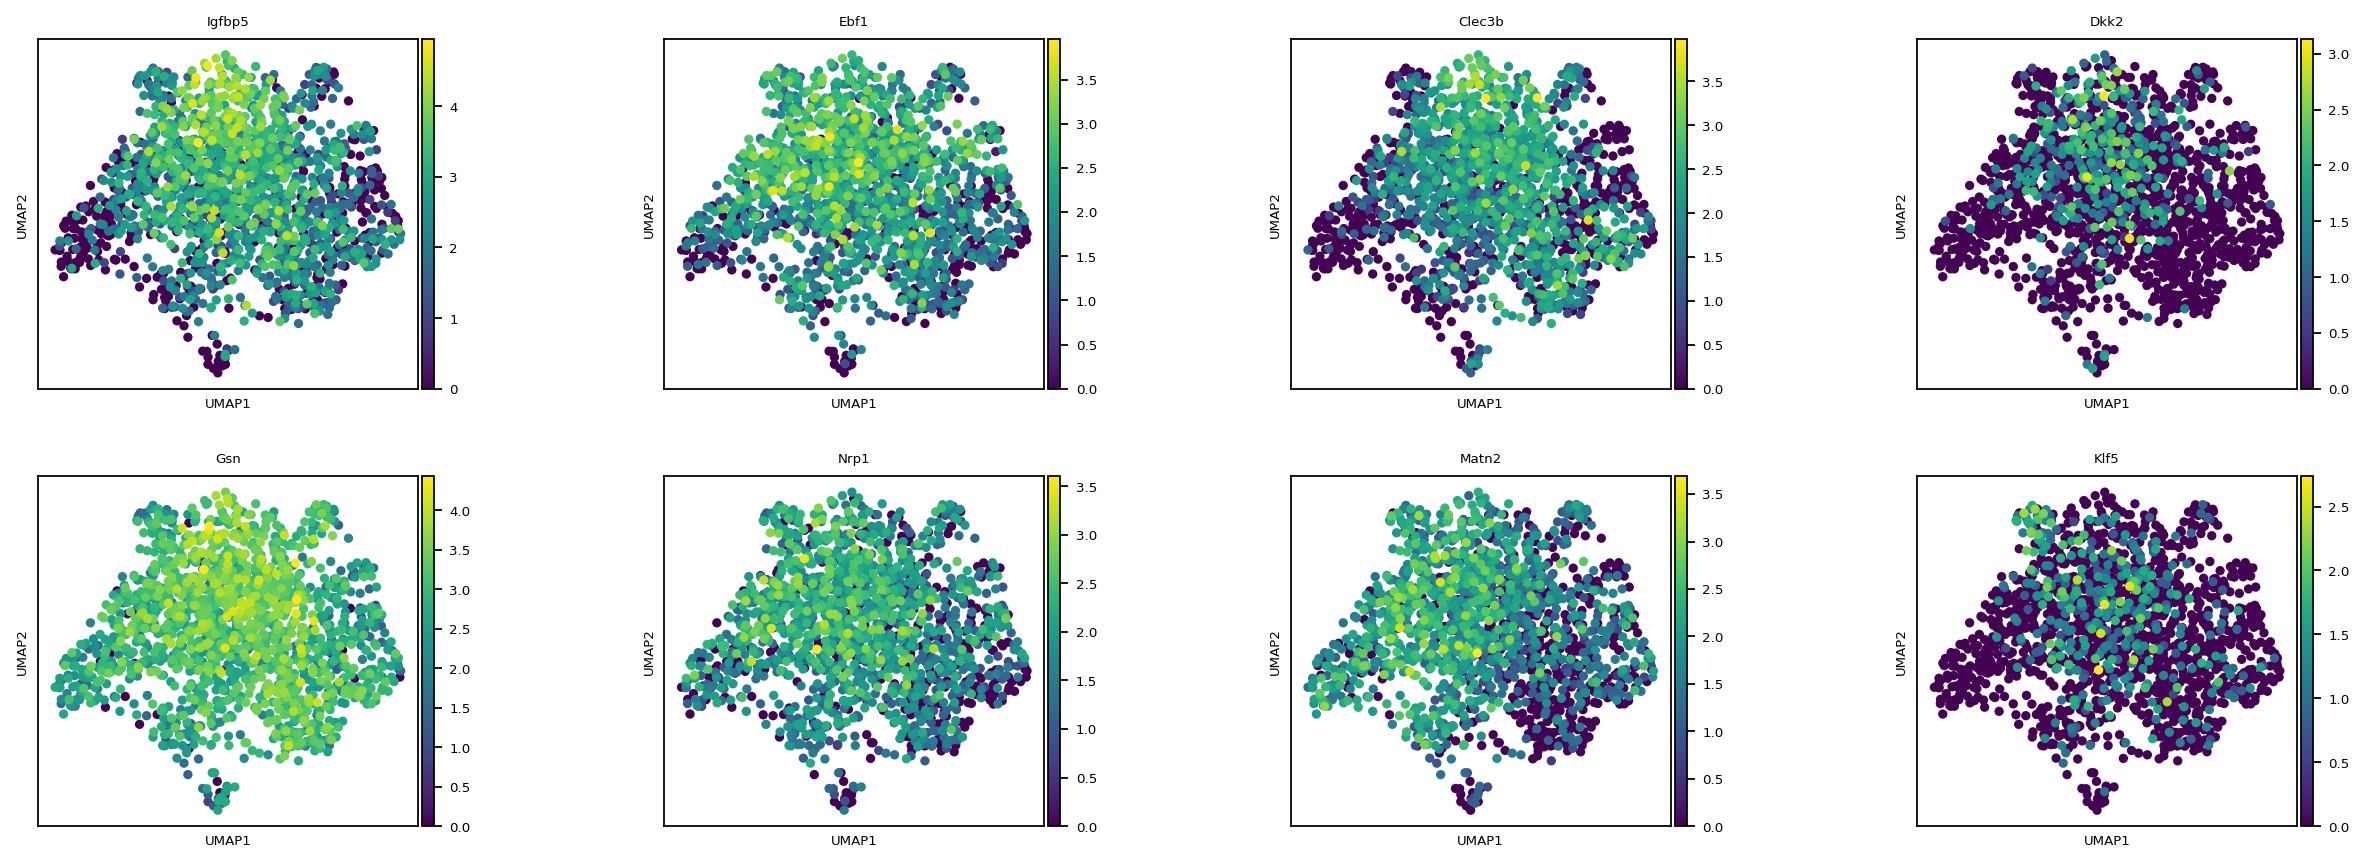

In [537]:
sc.pl.umap(intestine_fibro, color = pd.DataFrame(intestine_fibro.uns['rank_genes_groups_fibro_leiden_0.5']['names'])[0:8]["0"], wspace=0.5)

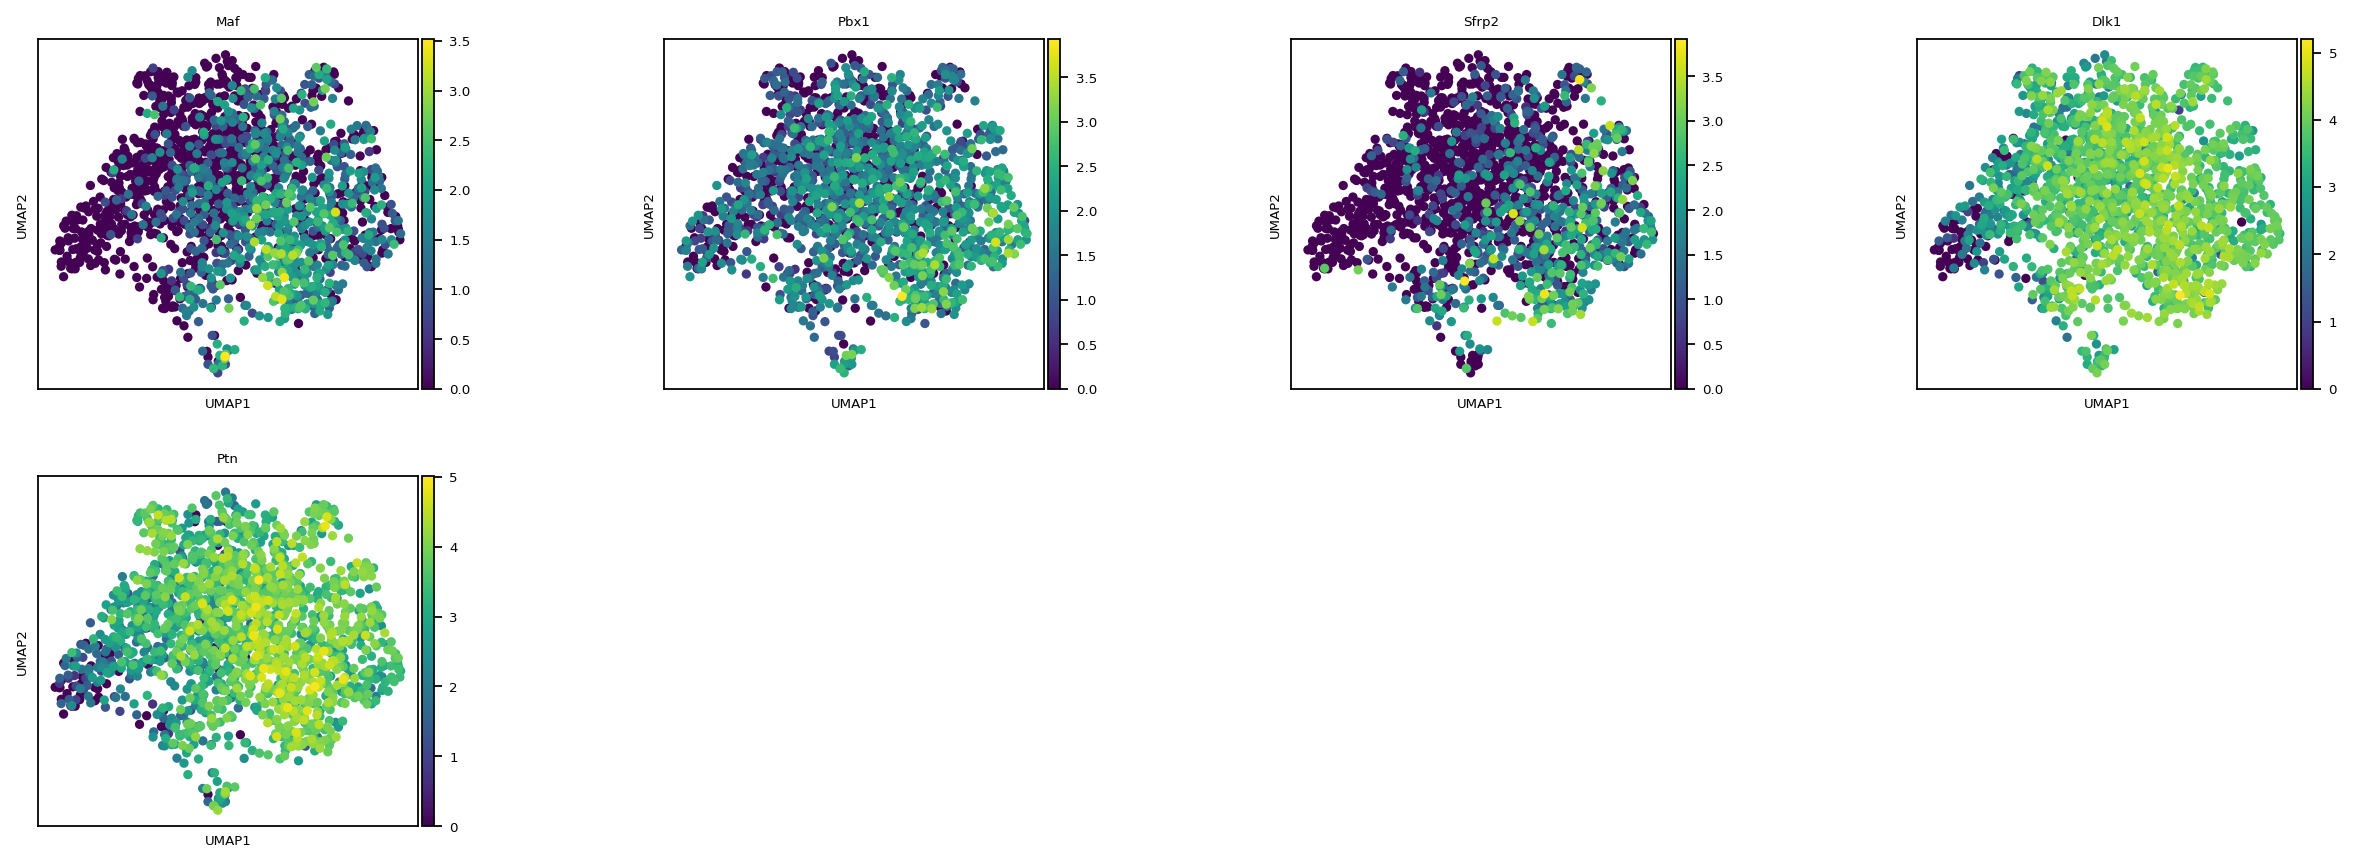

In [517]:
sc.pl.umap(intestine_fibro, color = pd.DataFrame(intestine_fibro.uns['rank_genes_groups_fibro_leiden_0.5']['names'])[0:5]["1"], wspace=0.5)

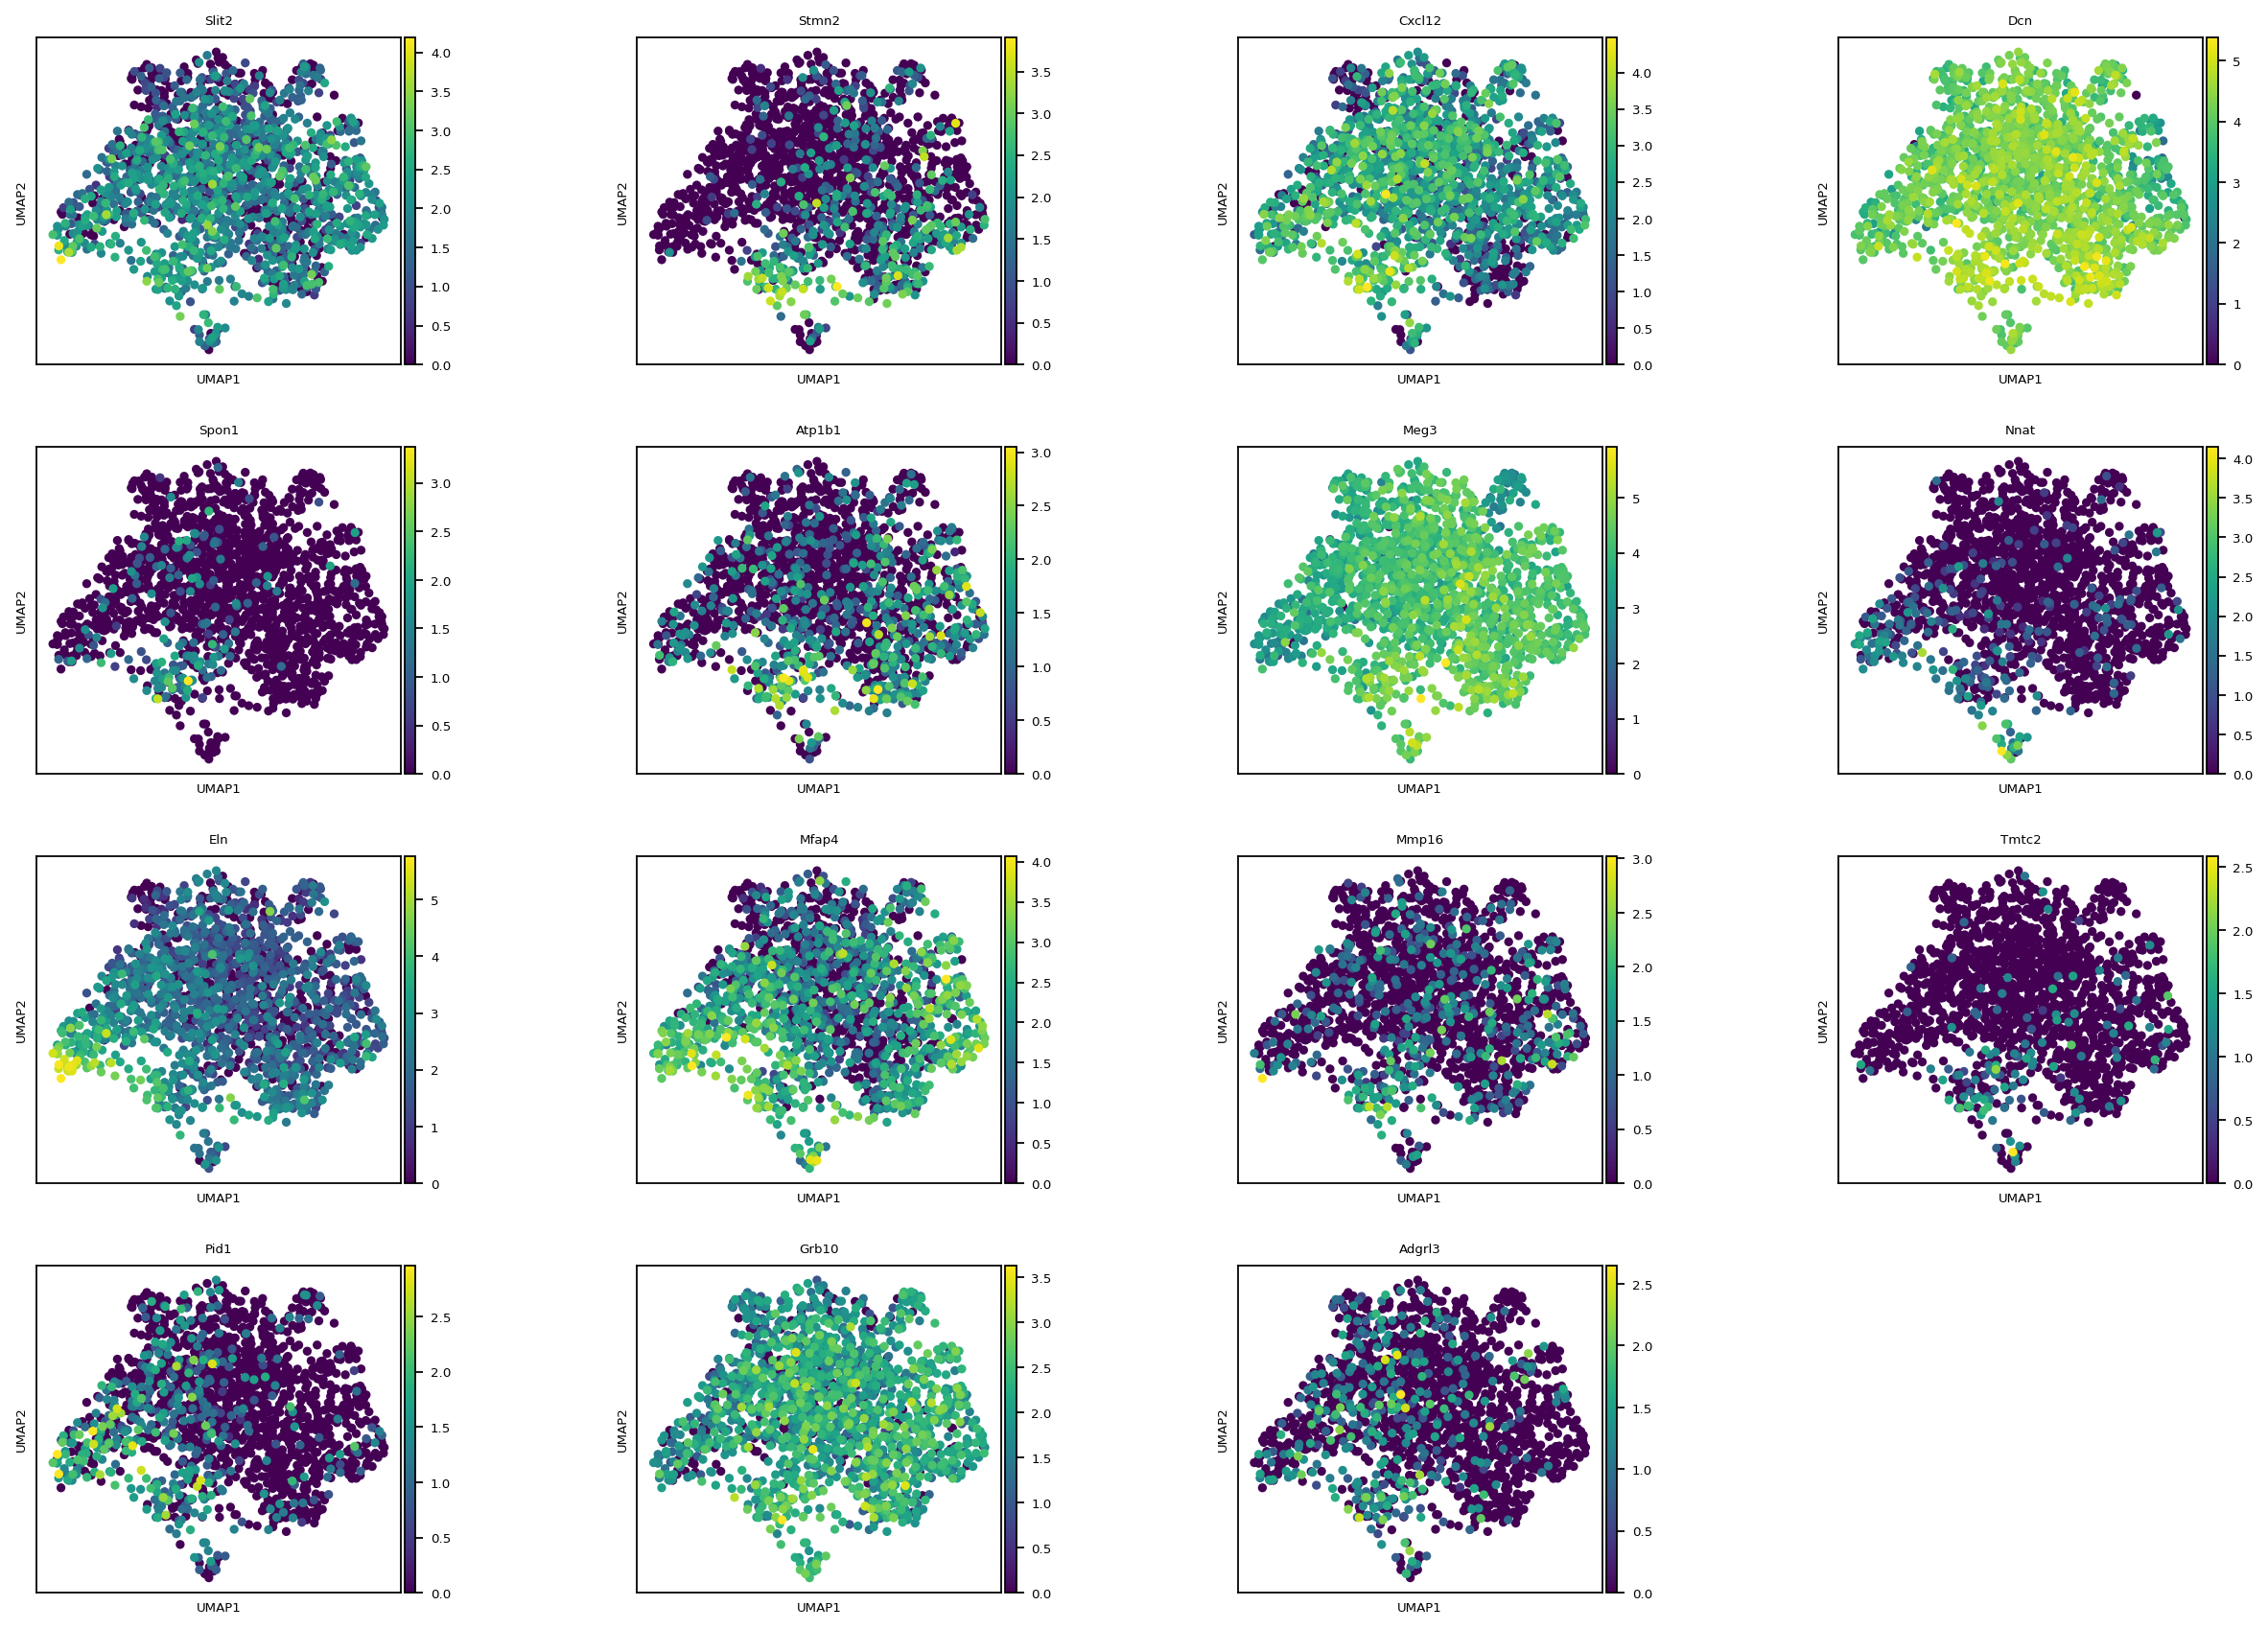

In [536]:
sc.pl.umap(intestine_fibro, color = pd.DataFrame(intestine_fibro.uns['rank_genes_groups_fibro_leiden_0.5']['names'])[0:15]["3"], wspace=0.5)

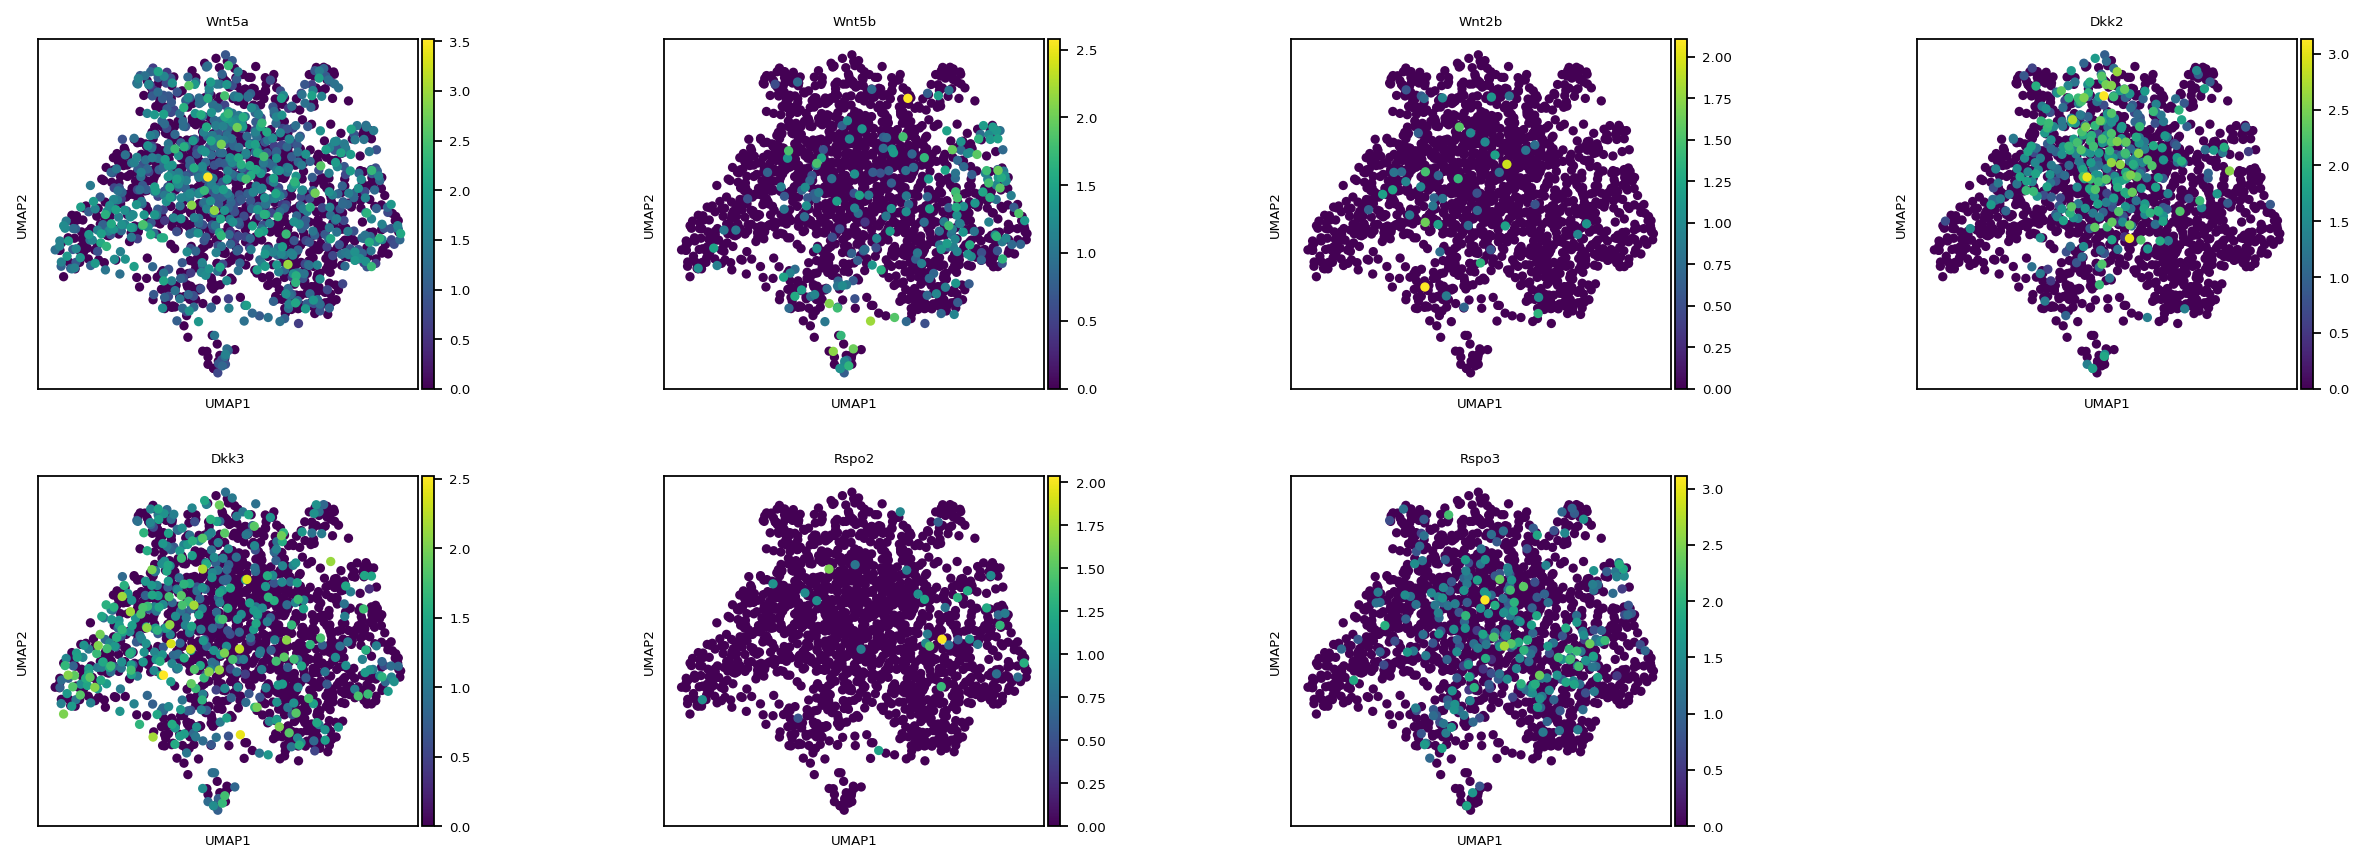

In [541]:
sc.pl.umap(intestine_fibro, color = ["Wnt5a", "Wnt5b", "Wnt2b", "Dkk2", "Dkk3", "Rspo2", "Rspo3"], wspace=0.5)

In [584]:
intestine_fibro.obs = intestine_fibro.obs.drop(columns=["clusters_fibro_leiden_0.4"])

In [585]:
intestine_fibro.obs["clusters_fibro_leiden_0.4"] = intestine_fibro.obs["fibro_leiden_0.4"]
celltypes = {'0': "Dkk2+ cells", 
             '1': "Sfrp2+ cells", 
            '2': "Myofibroblast cells", 
            '3': "Spon1+ cells", 
            '4': "Dkk2+ cells"}
intestine_fibro.obs["clusters_fibro_leiden_0.4"] = intestine_fibro.obs["clusters_fibro_leiden_0.4"].map(celltypes).astype("category")

In [586]:
sc.tl.rank_genes_groups(intestine_fibro, groupby="clusters_fibro_leiden_0.4", key_added="rank_genes_groups_clusters_fibro_leiden_0.4")


ranking genes
    finished: added to `.uns['rank_genes_groups_clusters_fibro_leiden_0.4']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [588]:
sc.tl.dendrogram(intestine_fibro, 'clusters_fibro_leiden_0.4')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_clusters_fibro_leiden_0.4']`


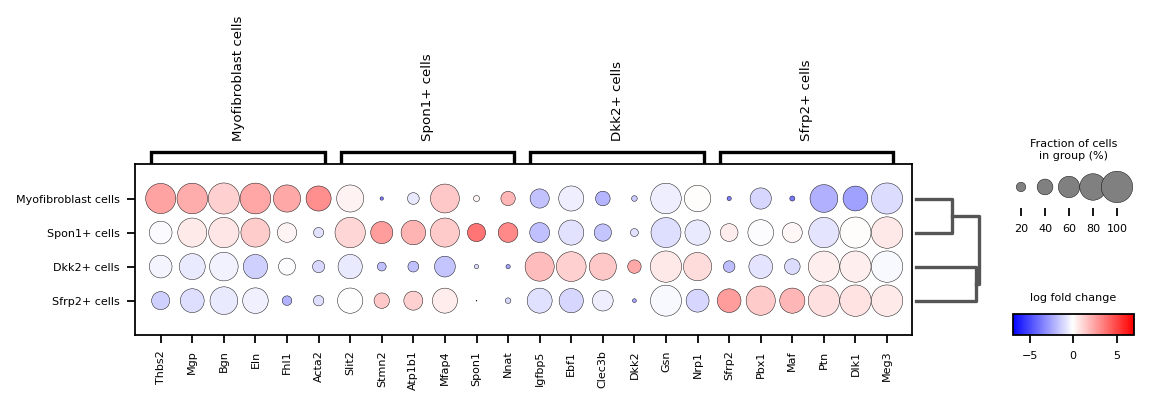

In [589]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, vector_friendly = False, format="pdf")
fig, ax = plt.subplots(figsize = (8,2.5))
sc.pl.rank_genes_groups_dotplot(intestine_fibro, n_genes=6, key="rank_genes_groups_clusters_fibro_leiden_0.4", values_to_plot='logfoldchanges', min_logfoldchange=0.5, vmax=7, vmin=-7, cmap='bwr', show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/fibro_subclusters_dotplot.pdf")

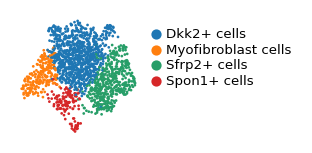

In [594]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(intestine_fibro, color = ['clusters_fibro_leiden_0.4'], size=6, legend_fontsize=6, frameon=False, title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/fibro_celltypes_umap.pdf")
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(3.0, 3.0), vector_friendly = False, transparent=True, format="pdf")

In [590]:
marker_genes_dict = {
    'Pericytes': ['Cspg4', 'Pdgfrb'],
    'Myocytes': ['Acta2', 'Tagln', "Hhip", "Des"],
    'Telocytes': ['Pdgfra', "Foxl1", "Bmp7", "Wnt5a"],
    'Tropocytes': ['Cd81', 'Rspo1', 'Rspo2', "Grem1"],
    'Interstetium cells': ['Cd81']
}

categories: Dkk2+ cells, Myofibroblast cells, Sfrp2+ cells, etc.
var_group_labels: Pericytes, Myocytes, Telocytes, etc.


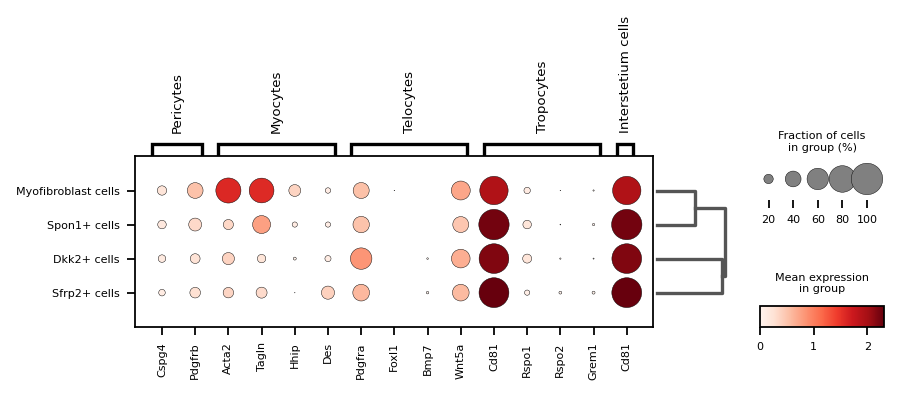

In [591]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, vector_friendly = False, format="pdf")
fig, ax = plt.subplots(figsize = (6,2.5))
sc.pl.dotplot(intestine_fibro, marker_genes_dict, 'clusters_fibro_leiden_0.4', dendrogram=True, show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/fibro_subclusters_geneplot1.pdf")

In [592]:
marker_genes_dict = {
    'R-spondins': ["Rspo1", "Rspo2", "Rspo3"],
    'WNTs': ['Wnt2b', 'Wnt4', "Wnt5a", "Wnt5b"],
    'WNT inhibitors': ['Dkk2', "Dkk3", "Sfrp1", "Frzb", "Wif1"],
    'BMPs': ['Bmp2', 'Bmp4', 'Bmp5', "Bmp6", "Bmp7"],
    'BMP inhibitors': ['Nog', "Chrd", "Grem1"]
}

categories: Dkk2+ cells, Myofibroblast cells, Sfrp2+ cells, etc.
var_group_labels: R-spondins, WNTs, WNT inhibitors, etc.


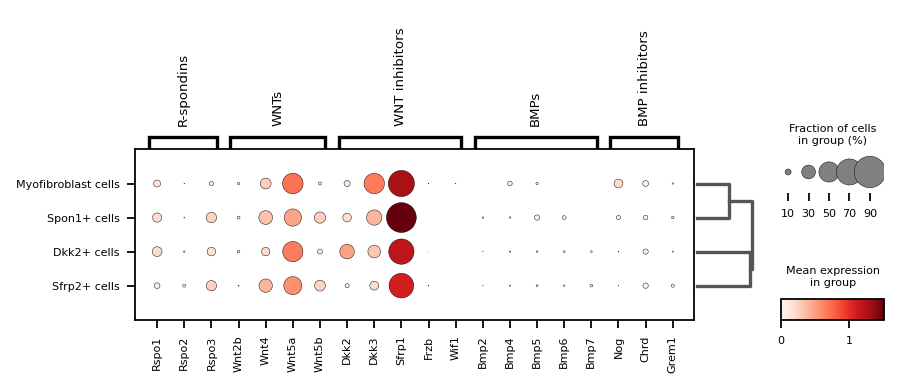

In [593]:
sc.settings.set_figure_params(dpi=80, dpi_save= 600, fontsize=6, frameon=True, figsize=(3, 3), transparent=True, vector_friendly = False, format="pdf")
fig, ax = plt.subplots(figsize = (6,2.5))
sc.pl.dotplot(intestine_fibro, marker_genes_dict, 'clusters_fibro_leiden_0.4', dendrogram=True, show=False, ax=ax)
# plt.tight_layout()
plt.savefig("./figures/fibro_subclusters_geneplot2.pdf")